In [66]:
import time, joblib, os, psutil
import onnxruntime as ort
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils.dataset import Dataset
from tqdm.auto import tqdm

In [2]:
pred_target_names = ['Pred_Load_Left_1(N)', 'Pred_Load_Left_2(N)', 'Pred_Load_Left_3(N)', 'Pred_Load_Left_4(N)', 'Pred_Load_Left_5(N)',
                     'Pred_Load_Right_1(N)', 'Pred_Load_Right_2(N)', 'Pred_Load_Right_3(N)', 'Pred_Load_Right_4(N)', 'Pred_Load_Right_5(N)']

In [3]:
absolute_error_names = ['Absolute_Error_Left_1(N)', 'Absolute_Error_Left_2(N)', 'Absolute_Error_Left_3(N)', 'Absolute_Error_Left_4(N)', 'Absolute_Error_Left_5(N)',
                        'Absolute_Error_Right_1(N)', 'Absolute_Error_Right_2(N)', 'Absolute_Error_Right_3(N)', 'Absolute_Error_Right_4(N)', 'Absolute_Error_Right_5(N)']

relative_error_names = ['Relative_Error_Left_1(%)', 'Relative_Error_Left_2(%)', 'Relative_Error_Left_3(%)', 'Relative_Error_Left_4(%)', 'Relative_Error_Left_5(%)',
                        'Relative_Error_Right_1(%)', 'Relative_Error_Right_2(%)', 'Relative_Error_Right_3(%)', 'Relative_Error_Right_4(%)', 'Relative_Error_Right_5(%)']

In [4]:
data_root_path = '.' + os.sep + 'data'
data_file_name_list = os.listdir(data_root_path)
data_file_name_list

['safe-boom-40-swing-180-load-40-.csv',
 'safe-boom-50-swing-180-load-50-.csv',
 'safe-boom-60-swing-180-load-60-.csv',
 'safe-boom-70-swing-180-load-100-.csv',
 'safe-boom-80-swing-180-load-120-.csv',
 'unsafe-swing-0-load-70-.csv',
 'unsafe-swing-0-load-90-.csv',
 'unsafe-swing-135-load-50-.csv',
 'unsafe-swing-135-load-70-.csv',
 'unsafe-swing-180-load-70-.csv',
 'unsafe-swing-180-load-90-.csv',
 'unsafe-swing-45-load-50-.csv',
 'unsafe-swing-45-load-70-.csv',
 'unsafe-swing-90-load-70-.csv',
 'unsafe-swing-90-load-90-.csv']

In [5]:
dataset_inst = Dataset(file_path_list=data_file_name_list)

  0%|          | 0/15 [00:00<?, ?it/s]

In [6]:
val_feature = dataset_inst.get_val_dataset_for_model()[dataset_inst.get_model_feature_names()]
val_feature

,f10,f11,f12
0,66.879271,1.560000e-30,40.0
1,66.733915,9.370000e-31,40.0
2,66.585904,9.870000e-30,40.0
3,66.435284,3.480000e-30,40.0
4,66.282099,-4.470000e-31,40.0
...,...,...,...
12170,55.358831,9.000000e+01,90.0
12171,55.133860,9.000000e+01,90.0
12172,54.908862,9.000000e+01,90.0
12173,54.683882,9.000000e+01,90.0


In [7]:
rf_model = joblib.load('rf_model.joblib')

In [74]:
rf_elapsed_time_list = []
rf_pred_list = []
rf_cpu_usage_list = []

for i in tqdm(range(val_feature.shape[0])):
    input_feature = pd.DataFrame(val_feature.iloc[i].values.reshape(1, -1), columns=dataset_inst.get_model_feature_names())
    t0 = time.time()
    rf_pred = rf_model.predict(input_feature)
    
    rf_elapsed_time_list.append(time.time() - t0)
    rf_pred_list.append(rf_pred)
    rf_cpu_usage_list.append(psutil.cpu_percent(interval=None, percpu=False))

  0%|          | 0/12175 [00:00<?, ?it/s]

In [75]:
rf_elapsed_time_arr = np.array(rf_elapsed_time_list)
rf_pred_arr = np.vstack(rf_pred_list)
rf_cpu_usage_arr = np.array(rf_cpu_usage_list)

In [10]:
np.savetxt('result\\rf_elapsed_time.csv', rf_elapsed_time_arr, delimiter=',')

Text(0.5, 0, 'sample')

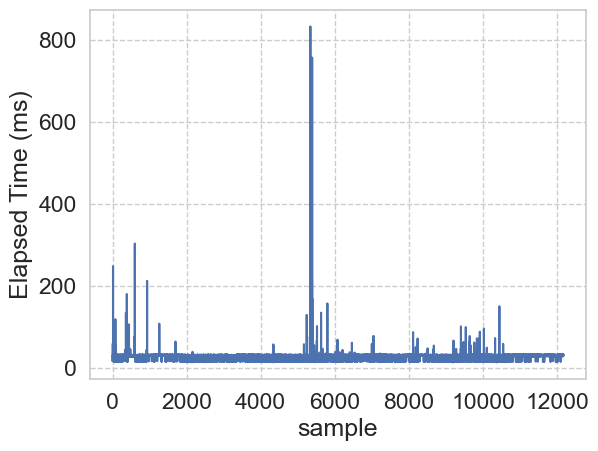

In [64]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.lineplot(rf_elapsed_time_arr*1000)
plt.ylabel('Elapsed Time (ms)')
plt.xlabel('sample')

Text(0.5, 0, 'Elapsed Time (ms)')

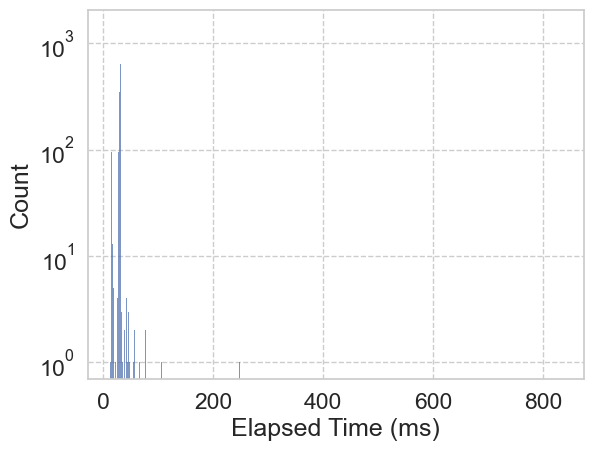

In [60]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.histplot(rf_elapsed_time_arr*1000)
plt.yscale('log')
plt.xlabel('Elapsed Time (ms)')

Text(0.5, 0, 'sample')

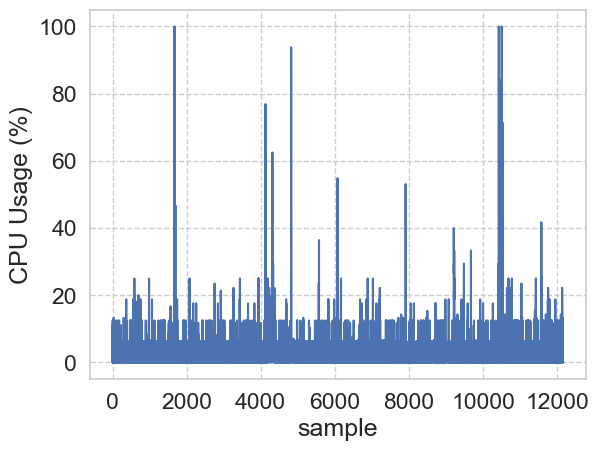

In [76]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.lineplot(rf_cpu_usage_arr)
plt.ylabel('CPU Usage (%)')
plt.xlabel('sample')

In [81]:
np.mean(rf_cpu_usage_arr)

2.2759671457905544

In [18]:
val_dataset = dataset_inst.get_val_dataset()

In [19]:
val_dataset.reset_index(drop=True, inplace=True)
val_dataset

,Boom_Angle(deg),Swing_Angle(deg),Load(Ton),Actual_Load_Left_1(N),Actual_Load_Left_2(N),Actual_Load_Left_3(N),Actual_Load_Left_4(N),Actual_Load_Left_5(N),Actual_Load_Right_1(N),Actual_Load_Right_2(N),Actual_Load_Right_3(N),Actual_Load_Right_4(N),Actual_Load_Right_5(N)
0,66.879271,1.560000e-30,40.0,170062.47,180680.23,191420.21,202263.13,213189.69,168664.7200,179283.9400,190028.3600,200878.5800,211815.210
1,66.733915,9.370000e-31,40.0,170483.87,180907.70,191448.84,202089.07,212810.14,169022.0200,179447.1800,189992.6500,200640.0800,211371.150
2,66.585904,9.870000e-30,40.0,171219.98,181343.90,191577.62,201904.46,212307.76,169498.5900,179622.9100,189860.3000,200194.0100,210607.250
3,66.435284,3.480000e-30,40.0,172178.57,181932.53,191787.34,201728.12,211740.01,170040.2700,179793.3400,189650.9900,199598.2500,209620.160
4,66.282099,-4.470000e-31,40.0,173074.62,182509.08,192036.91,201644.70,211319.02,170443.4100,179875.6600,189405.5600,199019.5700,208704.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12170,55.358831,9.000000e+01,90.0,462051.33,464014.70,465933.24,467806.33,469633.33,8792.9026,11045.4470,13535.4500,16257.2530,19205.198
12171,55.133860,9.000000e+01,90.0,463830.77,466038.10,468185.27,470271.32,472295.30,6649.9670,8816.9263,11268.6360,13997.9220,16997.608
12172,54.908862,9.000000e+01,90.0,465449.65,467946.52,470361.77,472693.91,474941.47,4647.1116,6681.1238,9061.7776,11779.7840,14825.853
12173,54.683882,9.000000e+01,90.0,466684.16,469636.63,472468.95,475178.49,477762.68,2754.5771,4601.4865,6896.1467,9625.4635,12776.343


In [20]:
actual_load = val_dataset[dataset_inst.get_data_target_names()].values
absolute_error = pd.DataFrame(abs(actual_load-rf_pred_arr), columns=absolute_error_names)
relative_error = pd.DataFrame((abs(actual_load-rf_pred_arr)/abs(actual_load))*100, columns=relative_error_names)
rf_result = pd.concat([val_dataset, pd.DataFrame(rf_pred_arr, columns=dataset_inst.get_data_target_names()) , absolute_error, relative_error], axis=1)

rf_result.describe()

,Boom_Angle(deg),Swing_Angle(deg),Load(Ton),Actual_Load_Left_1(N),Actual_Load_Left_2(N),Actual_Load_Left_3(N),Actual_Load_Left_4(N),Actual_Load_Left_5(N),Actual_Load_Right_1(N),Actual_Load_Right_2(N),...,Relative_Error_Left_1(%),Relative_Error_Left_2(%),Relative_Error_Left_3(%),Relative_Error_Left_4(%),Relative_Error_Left_5(%),Relative_Error_Right_1(%),Relative_Error_Right_2(%),Relative_Error_Right_3(%),Relative_Error_Right_4(%),Relative_Error_Right_5(%)
count,12175.000000,1.217500e+04,12175.000000,12175.000000,12175.000000,12175.000000,12175.000000,12175.000000,12175.000000,12175.000000,...,1.217500e+04,1.217500e+04,12175.000000,1.217500e+04,12175.000000,12175.000000,12175.000000,12175.000000,12175.000000,12175.000000
mean,63.520530,8.060977e+01,70.671047,280420.008592,270239.083296,258122.330067,245833.398274,235135.937374,208889.004659,195573.684626,...,4.573995e-01,3.401180e-01,0.285308,4.080203e-01,0.719929,0.651381,0.474835,0.402675,0.569290,1.011804
std,11.369928,6.067786e+01,23.783388,110252.169601,71306.393845,49564.991274,74177.162316,113706.098285,109508.564461,67417.641354,...,1.062899e+00,7.732662e-01,0.632280,8.120523e-01,1.678449,1.486570,1.018494,0.906481,1.309648,2.422191
min,40.000000,-3.180000e-28,40.000000,1351.487900,66400.622000,182590.050000,69831.394000,1380.030800,1038.630700,2564.975100,...,2.866178e-07,3.234412e-07,0.000003,5.340467e-07,0.000003,0.000000,0.000000,0.000000,0.000000,0.000005
25%,59.460772,2.449026e+01,50.000000,205512.070000,214880.465000,214803.955000,191082.420000,147007.710000,115725.100000,144689.940000,...,1.510945e-02,9.118567e-03,0.004597,8.348353e-03,0.014252,0.019616,0.012074,0.006672,0.013342,0.022736
50%,70.000000,7.574472e+01,70.000000,298398.750000,276248.910000,253963.040000,249802.650000,227857.440000,206677.930000,197477.600000,...,5.099143e-02,3.065399e-02,0.015767,3.162056e-02,0.061963,0.071244,0.041213,0.022263,0.049097,0.096671
75%,70.000000,1.350000e+02,90.000000,358767.815000,314003.340000,283763.430000,297335.065000,327901.890000,294826.955000,238508.795000,...,2.897671e-01,2.383697e-01,0.188721,3.913114e-01,0.680518,0.542405,0.409478,0.269952,0.390172,0.685086
max,80.000000,1.800000e+02,120.000000,493019.530000,470991.390000,474538.750000,477879.600000,489313.250000,492176.150000,392850.990000,...,2.057640e+01,1.289467e+01,10.577979,1.066342e+01,38.562538,49.327595,25.158362,14.812926,17.679746,37.215117


In [21]:
rf_result.to_csv('result\\rf_result.csv', index=False)

In [22]:
onnx_model = ort.InferenceSession('rf_model.onnx')
input_name = onnx_model.get_inputs()[0].name
output_name = onnx_model.get_outputs()[0].name

In [23]:
input_data = val_feature.values.astype(np.float32)

In [77]:
onnx_elapsed_time_list = []
onnx_pred_list = []
onnx_cpu_usage_list = []

for input_val in tqdm(input_data):
    input_val = input_val.reshape(1, -1)
    t0 = time.time()
    onnx_pred = onnx_model.run(output_names=None, input_feed={'float_input': input_val})[0][0]
    
    onnx_elapsed_time_list.append(time.time() - t0)
    onnx_pred_list.append(onnx_pred)
    onnx_cpu_usage_list.append(psutil.cpu_percent(interval=None, percpu=False))

  0%|          | 0/12175 [00:00<?, ?it/s]

In [78]:
onnx_elapsed_time_arr = np.array(onnx_elapsed_time_list)
onnx_pred_arr = np.vstack(onnx_pred_list)
onnx_cpu_usage_arr = np.array(onnx_cpu_usage_list)

In [26]:
np.savetxt('result\\onnx_elapsed_time.csv', np.vstack(onnx_elapsed_time_list), delimiter=',')

Text(0.5, 0, 'sample')

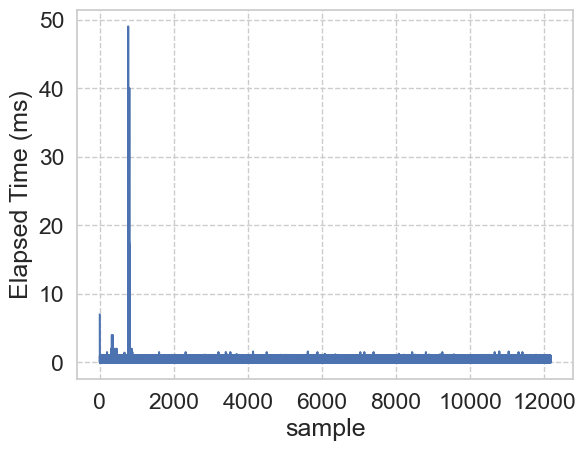

In [63]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.lineplot(onnx_elapsed_time_arr*1000)
plt.ylabel('Elapsed Time (ms)')
plt.xlabel('sample')

Text(0.5, 0, 'Elapsed Time (ms)')

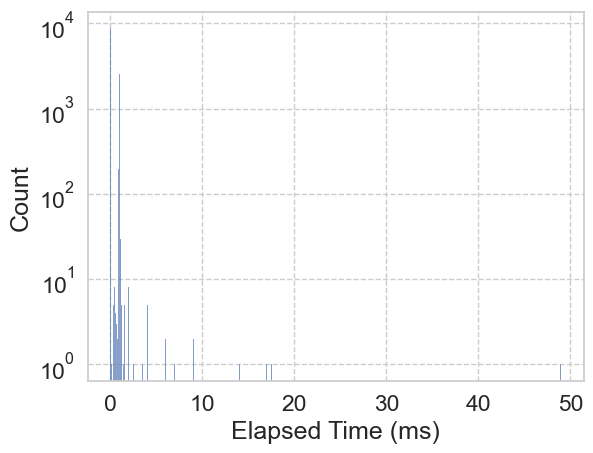

In [62]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.histplot(onnx_elapsed_time_arr*1000)
plt.yscale('log')
plt.xlabel('Elapsed Time (ms)')

Text(0.5, 0, 'sample')

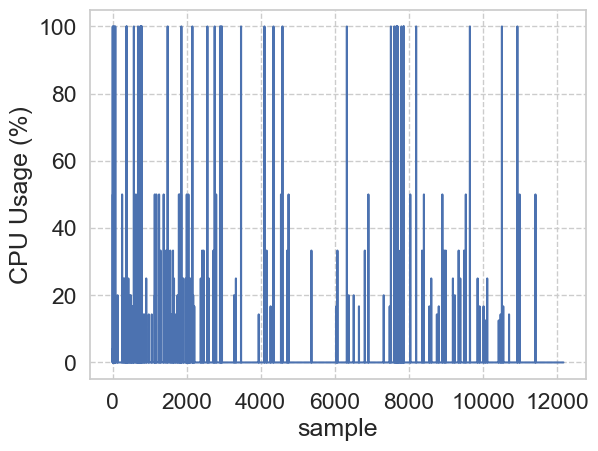

In [79]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.lineplot(onnx_cpu_usage_arr)
plt.ylabel('CPU Usage (%)')
plt.xlabel('sample')

In [80]:
np.mean(onnx_cpu_usage_arr)

0.6790061601642711

In [ ]:
actual_load = val_dataset[dataset_inst.get_data_target_names()].values
absolute_error = pd.DataFrame(abs(actual_load-onnx_pred_arr), columns=absolute_error_names)
relative_error = pd.DataFrame((abs(actual_load-onnx_pred_arr)/abs(actual_load))*100, columns=relative_error_names)
onnx_result = pd.concat([val_dataset, pd.DataFrame(onnx_pred_arr, columns=dataset_inst.get_data_target_names()), absolute_error, relative_error], axis=1)

onnx_result.describe()

In [31]:
onnx_result.to_csv('result\\onnx_result.csv', index=False)

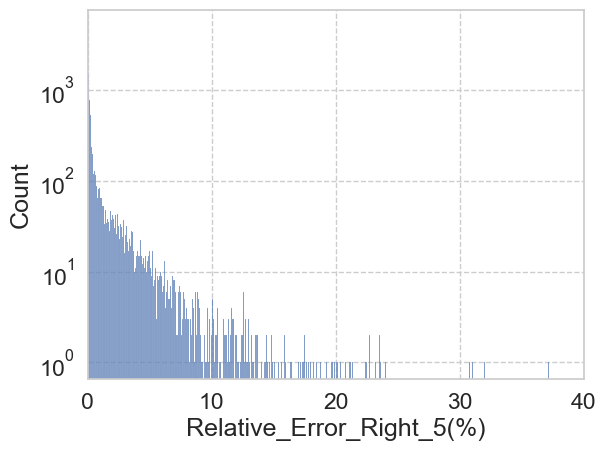

In [44]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.histplot(onnx_result['Relative_Error_Right_5(%)'])
plt.xlim(0, 40)
plt.yscale('log')